In [1]:
# Part-1 (Defining probelm)
'''
Aim: Predicting stock price

Target: Price
Feature: Date, open and closing stock price
'''

'\nAim: Predicting stock price\n\nTarget: Price\nFeature: Date, open and closing stock price\n'

In [2]:
# Part-2 (Importing file)
import pandas as pd

df = pd.read_csv("C:\\Users\\satya\\Desktop\\Jupitar\\Projects\\all_stocks_5yr.csv")

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Part-3 (Data cleaning)
# Checking head
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
# Shape
df.shape

(619040, 7)

In [5]:
# Checking statistical summey
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


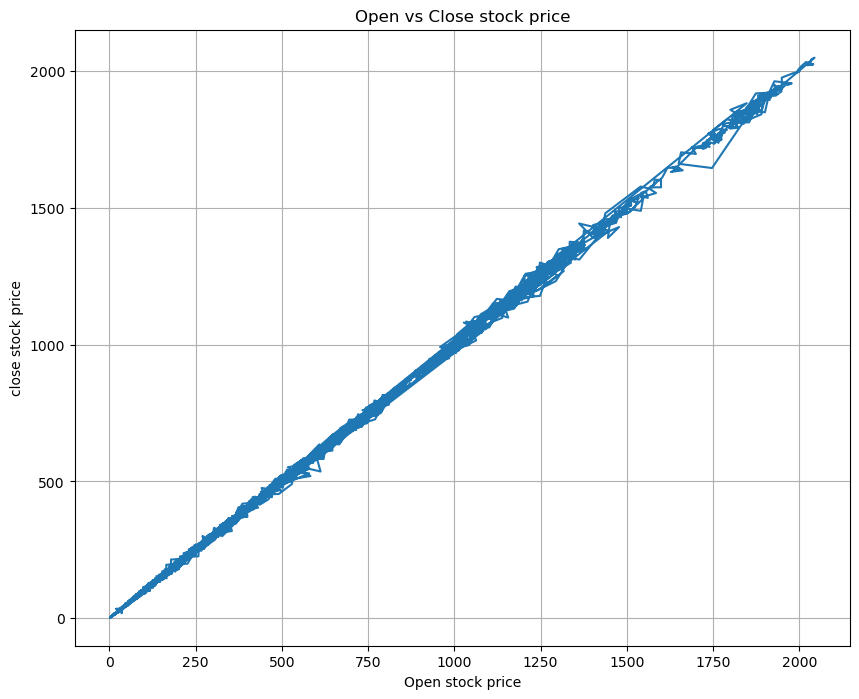

In [6]:
# checking plt graph before checking null values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(df['open'],df['close'])
plt.xlabel('Open stock price')
plt.ylabel('close stock price')
plt.title('Open vs Close stock price')
plt.grid(True)
plt.show()

In [7]:
# checking for null values
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [8]:
# Filling null values
df['open'] = df['open'].fillna(df['open'].mean())
df['high'] = df['high'].fillna(df['high'].mean())
df['low'] = df['low'].fillna(df['low'].mean())

In [9]:
# Re-checking null values
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
# checking duplicate values
df.duplicated().sum()

0

In [11]:
# Removing duplicates (if there)
df.drop_duplicates()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [12]:
# Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [13]:
numerical_features = ['open','high','low','close','volume']
categorical_features = ['date','Name']

print("Head of numerical features: \n",df.loc[0:5,numerical_features])
print()
print("Head of Categorical features: \n",df.loc[0:5,categorical_features])

Head of numerical features: 
     open   high    low  close    volume
0  15.07  15.12  14.63  14.75   8407500
1  14.89  15.01  14.26  14.46   8882000
2  14.45  14.51  14.10  14.27   8126000
3  14.30  14.94  14.25  14.66  10259500
4  14.94  14.96  13.16  13.99  31879900
5  13.93  14.61  13.93  14.50  15628000

Head of Categorical features: 
          date Name
0  2013-02-08  AAL
1  2013-02-11  AAL
2  2013-02-12  AAL
3  2013-02-13  AAL
4  2013-02-14  AAL
5  2013-02-15  AAL


In [14]:
# Handling outliers 
def Inter_Quartile_Range(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR =Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = col[((col < lower_bound) | (col > upper_bound))]
    clean_col = col[~((col < lower_bound) | (col > upper_bound))]
    
    return clean_col
    
clean_df = df.copy()

for col in numerical_features:
    clean_df[col] = Inter_Quartile_Range(df[col])
    print("Removed outliers in column '{}': ".format(col))
    print(clean_df[col])

Removed outliers in column 'open': 
0         15.07
1         14.89
2         14.45
3         14.30
4         14.94
          ...  
619035    76.84
619036    77.53
619037    76.64
619038    72.74
619039    72.70
Name: open, Length: 619040, dtype: float64
Removed outliers in column 'high': 
0         15.12
1         15.01
2         14.51
3         14.94
4         14.96
          ...  
619035    78.27
619036    78.12
619037    76.92
619038    74.56
619039    75.00
Name: high, Length: 619040, dtype: float64
Removed outliers in column 'low': 
0         14.63
1         14.26
2         14.10
3         14.25
4         13.16
          ...  
619035    76.69
619036    76.73
619037    73.18
619038    72.13
619039    72.69
Name: low, Length: 619040, dtype: float64
Removed outliers in column 'close': 
0         14.75
1         14.46
2         14.27
3         14.66
4         13.99
          ...  
619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, Length: 619

In [15]:
# Refilling null values in df
clean_df.isnull().sum()

date          0
open      38963
high      39020
low       38894
close     38941
volume    59503
Name          0
dtype: int64

In [16]:
# Handling null values

clean_df['open'] = clean_df['open'].fillna(clean_df['open'].mean())
clean_df['high'] = clean_df['high'].fillna(clean_df['high'].mean())
clean_df['low'] = clean_df['low'].fillna(clean_df['low'].mean())
clean_df['close'] = clean_df['close'].fillna(clean_df['close'].mean())
clean_df['volume'] = clean_df['volume'].fillna(clean_df['volume'].mean())

In [17]:
# Re-Checking null values
clean_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [18]:
# Part-4 (Data Preprocessing)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_features:
    clean_df[col] = le.fit_transform(clean_df[col])

In [20]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_std = pd.DataFrame(ss.fit_transform(clean_df),columns = clean_df.columns)

print("Glimpse of standardized dataset: \n")
df_std.head()

Glimpse of standardized dataset: 



,date,open,high,low,close,volume,Name
0,-1.748180,-1.472965,-1.477134,-1.480061,-1.482161,3.154671,-1.726568
1,-1.745427,-1.478159,-1.480285,-1.490823,-1.490526,3.407094,-1.726568
2,-1.742674,-1.490857,-1.494603,-1.495476,-1.496006,3.004920,-1.726568
3,-1.739922,-1.495186,-1.482289,-1.491114,-1.484757,0.000000,-1.726568
4,-1.737169,-1.476716,-1.481716,-1.522816,-1.504083,0.000000,-1.726568


In [21]:
# Part-5 (Feature Engineering)
# importing visualizing tools
import matplotlib.pyplot as plt
import seaborn as sb

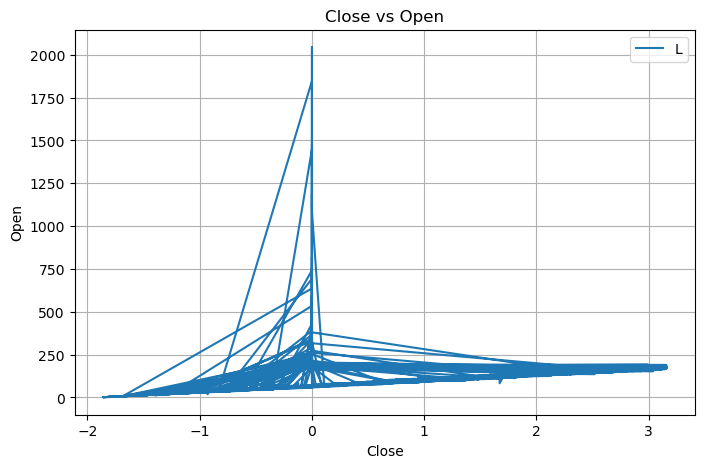

In [22]:
# Normal Plot
plt.figure(figsize=(8,5))
plt.plot(df_std['close'],df['open'])
plt.title('Close vs Open')
plt.legend('Line')
plt.xlabel('Close')
plt.ylabel('Open')
plt.grid(True)
plt.show()

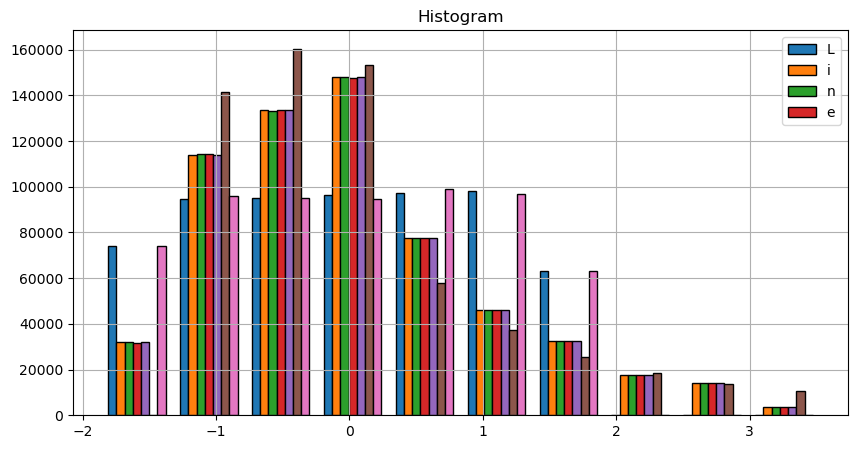

In [23]:
# Histogram

plt.figure(figsize=(10,5))
plt.hist(df_std, bins=10, edgecolor='black')
plt.title('Histogram')
plt.legend('Line')

plt.grid(True)
plt.show()

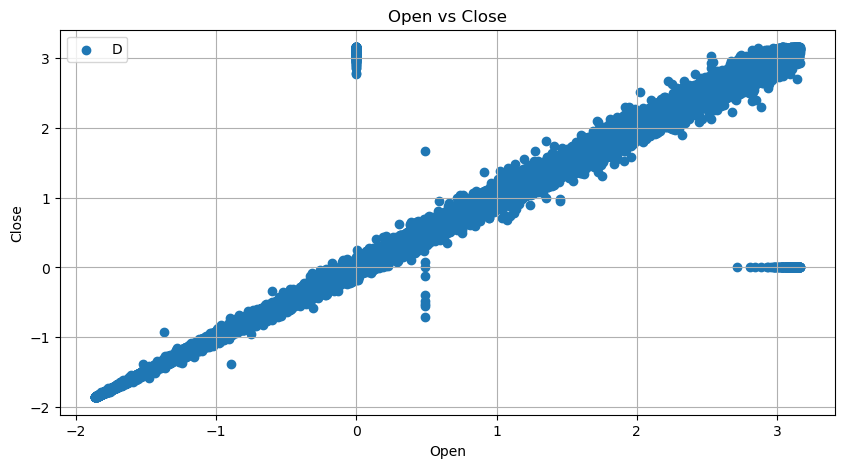

In [24]:
# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df_std['open'],df_std['close'])
plt.title('Open vs Close')
plt.legend('Dot')
plt.xlabel('Open')
plt.ylabel('Close')
plt.grid(True)
plt.show()

In [25]:
# Correlation matrix:
correlation_matrix = df_std.corr()
print("Correlation matrix: ")
print(correlation_matrix)

Correlation matrix: 
            date      open      high       low     close    volume      Name
date    1.000000  0.143845  0.144012  0.143916  0.143846  0.007625  0.001460
open    0.143845  1.000000  0.995271  0.995279  0.993167 -0.284643  0.013562
high    0.144012  0.995271  1.000000  0.994051  0.995213 -0.283478  0.014093
low     0.143916  0.995279  0.994051  1.000000  0.995171 -0.285933  0.013197
close   0.143846  0.993167  0.995213  0.995171  1.000000 -0.284855  0.013486
volume  0.007625 -0.284643 -0.283478 -0.285933 -0.284855  1.000000 -0.003956
Name    0.001460  0.013562  0.014093  0.013197  0.013486 -0.003956  1.000000


Text(0.5, 1.0, 'Correlational matrix')

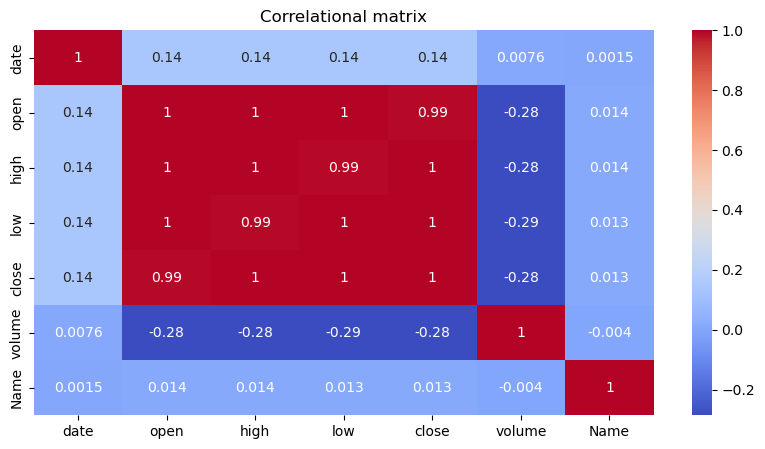

In [26]:
# Generating headmap or correlation matrix
plt.figure(figsize=(10,5))
sb.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlational matrix')

In [27]:
# Part-6 (Model Selectio and training)

In [28]:
# Defining the target and feature
feature = df_std.drop('close',axis=1)
target = df_std['close']

In [29]:
# Feature Selection
from sklearn.feature_selection import SelectKBest,RFE,f_regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
skb = SelectKBest(score_func = f_regression,k=5)
rfe = RFE(lr, n_features_to_select=5)

feature_skb = skb.fit_transform(feature,target)
feature_rfe = rfe.fit_transform(feature,target)

In [30]:
print("Features selected by SelectKBest: ",feature.columns[skb.get_support()])

Features selected by SelectKBest:  Index(['date', 'open', 'high', 'low', 'volume'], dtype='object')


In [31]:
print("Features selected by RFE: ",feature.columns[rfe.get_support()])

Features selected by RFE:  Index(['date', 'open', 'high', 'low', 'volume'], dtype='object')


In [32]:
feature_own = df_std[['open','high','low','volume']]
print("Features selected by MEE..: ",feature_own.columns)

Features selected by MEE..:  Index(['open', 'high', 'low', 'volume'], dtype='object')


In [33]:
feature_all = df_std[['date','open','high','low','close','volume','Name']]
print("All features: ",feature_all.columns)

All features:  Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [34]:
# Training the data using RFE
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_rfe,target,train_size=0.2,random_state=42)

In [35]:
from sklearn.metrics import r2_score

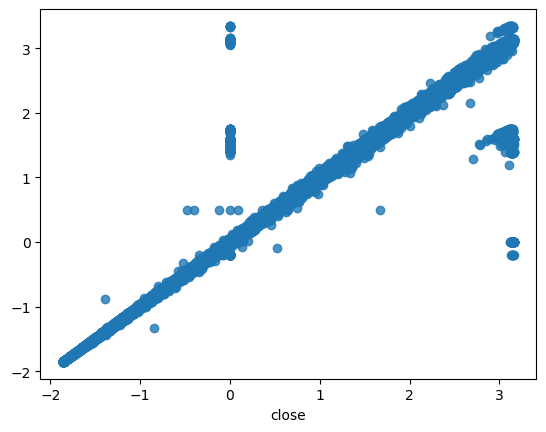

In [36]:
# Training using Linear Regression

lr.fit(x_train,y_train)
pred_lr_rfe = lr.predict(x_test)
r2_lin_rfe = r2_score(y_test, pred_lr_rfe)

sb.regplot(df_std,x=y_test,y=pred_lr_rfe)
plt.show()

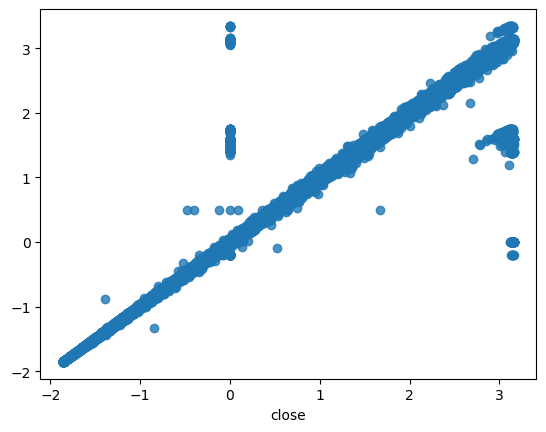

In [37]:
# Training the data using SelectKBest
x_train,x_test,y_train,y_test = train_test_split(feature_skb,target,train_size=0.2,random_state=42)

# Training using linear regression
lr.fit(x_train,y_train)
pred_lr_skb = lr.predict(x_test)

r2_lin_skb= r2_score(y_test,pred_lr_skb)
# Regplot

sb.regplot(df_std,x=y_test,y=pred_lr_skb)
plt.show()

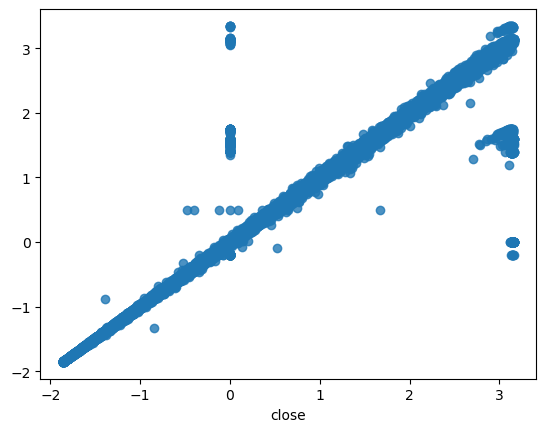

In [38]:
# Training the data using my own feature selection
x_train,x_test,y_train,y_test = train_test_split(feature_own,target,train_size=0.2,random_state=42)

# Training using linear regression
lr.fit(x_train,y_train)
pred_lr_own = lr.predict(x_test)

r2_lin_own = r2_score(y_test,pred_lr_own)
# Regplot

sb.regplot(df_std,x=y_test,y=pred_lr_own)
plt.show()

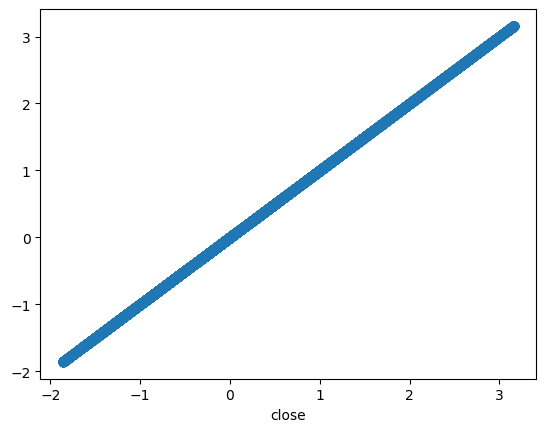

In [39]:
# Training using all features with linear regression
x_train,x_test,y_train,y_test = train_test_split(feature_all,target,train_size=0.2,random_state=42)
lr.fit(x_train,y_train)
pred_lr_all = lr.predict(x_test)

r2_lin_all = r2_score(y_test,pred_lr_all)

sb.regplot(df_std,x=y_test, y=pred_lr_all)
plt.show()

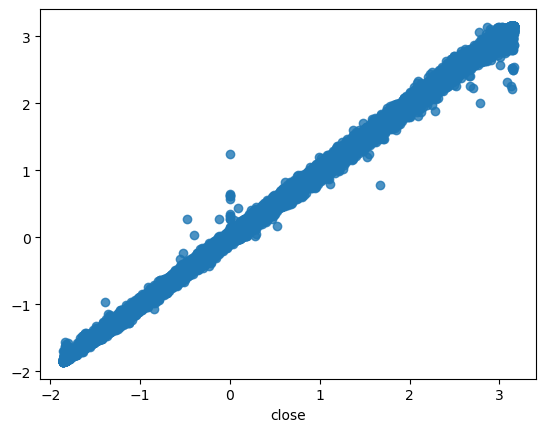

In [40]:
# Traing using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
predic_kn = kn.predict(x_test)

r2_kn = r2_score(y_test,predic_kn)
sb.regplot(df, x=y_test, y=predic_kn)
plt.show()

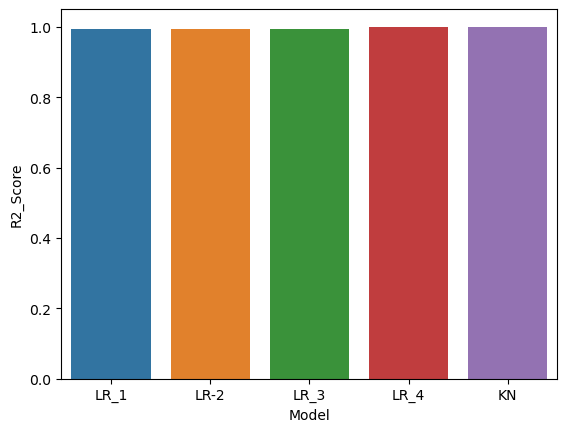

In [41]:
# comparing the accuracy
data = {'Model':['LR_1','LR-2','LR_3','LR_4','KN'],'R2_Score':[r2_lin_rfe,r2_lin_skb,r2_lin_own,r2_lin_all,r2_kn]}
df = pd.DataFrame(data)
sb.barplot(x='Model',y='R2_Score',data=df)
plt.show()